In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [2]:
newsgroups_train_raw = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, remove=())
newsgroups_test_raw = fetch_20newsgroups(subset='test', shuffle=True, random_state=42, remove=())

newsgroups_train_clean = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, 
                                             remove=('headers', 'footers', 'quotes'))
newsgroups_test_clean = fetch_20newsgroups(subset='test', shuffle=True, random_state=42, 
                                            remove=('headers', 'footers', 'quotes'))

print("Raw Train Size:", len(newsgroups_train_raw.data))
print("Raw Test Size:", len(newsgroups_test_raw.data))
print("Clean Train Size:", len(newsgroups_train_clean.data))
print("Clean Test Size:", len(newsgroups_test_clean.data))
print("\nNumber of Categories:", len(newsgroups_train_raw.target_names))


Raw Train Size: 11314
Raw Test Size: 7532
Clean Train Size: 11314
Clean Test Size: 7532

Number of Categories: 20


In [3]:
category_names = newsgroups_train_raw.target_names
print("All 20 Categories:\n")
for idx, cat in enumerate(category_names):
    print(f"{idx:2d}: {cat}")


All 20 Categories:

 0: alt.atheism
 1: comp.graphics
 2: comp.os.ms-windows.misc
 3: comp.sys.ibm.pc.hardware
 4: comp.sys.mac.hardware
 5: comp.windows.x
 6: misc.forsale
 7: rec.autos
 8: rec.motorcycles
 9: rec.sport.baseball
10: rec.sport.hockey
11: sci.crypt
12: sci.electronics
13: sci.med
14: sci.space
15: soc.religion.christian
16: talk.politics.guns
17: talk.politics.mideast
18: talk.politics.misc
19: talk.religion.misc


In [4]:
train_categories, train_counts = np.unique(newsgroups_train_raw.target, return_counts=True)
test_categories, test_counts = np.unique(newsgroups_test_raw.target, return_counts=True)

distribution_df = pd.DataFrame({
    'Category': [category_names[i] for i in train_categories],
    'Train_Count': train_counts,
    'Test_Count': test_counts,
    'Total': train_counts + test_counts,
    'Train_Pct': (train_counts / train_counts.sum() * 100).round(2),
    'Test_Pct': (test_counts / test_counts.sum() * 100).round(2)
})

print(distribution_df)
print(f"\nTrain/Test Split Ratio: {len(newsgroups_train_raw.data)} / {len(newsgroups_test_raw.data)}")
print(f"Percentage: {len(newsgroups_train_raw.data)/(len(newsgroups_train_raw.data)+len(newsgroups_test_raw.data))*100:.1f}% train")


                    Category  Train_Count  Test_Count  Total  Train_Pct  \
0                alt.atheism          480         319    799       4.24   
1              comp.graphics          584         389    973       5.16   
2    comp.os.ms-windows.misc          591         394    985       5.22   
3   comp.sys.ibm.pc.hardware          590         392    982       5.21   
4      comp.sys.mac.hardware          578         385    963       5.11   
5             comp.windows.x          593         395    988       5.24   
6               misc.forsale          585         390    975       5.17   
7                  rec.autos          594         396    990       5.25   
8            rec.motorcycles          598         398    996       5.29   
9         rec.sport.baseball          597         397    994       5.28   
10          rec.sport.hockey          600         399    999       5.30   
11                 sci.crypt          595         396    991       5.26   
12           sci.electron

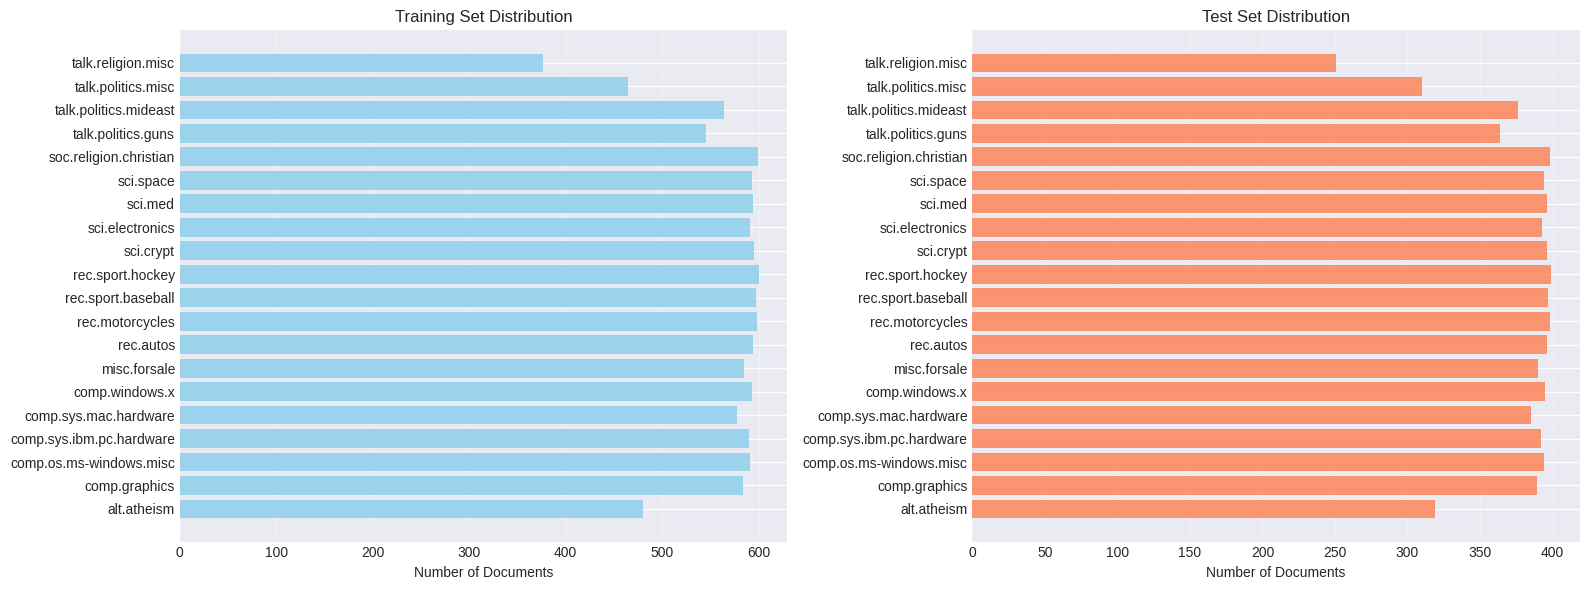

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(distribution_df['Category'], distribution_df['Train_Count'], color='skyblue', alpha=0.8)
axes[0].set_xlabel('Number of Documents')
axes[0].set_title('Training Set Distribution')
axes[0].grid(axis='x', alpha=0.3)

axes[1].barh(distribution_df['Category'], distribution_df['Test_Count'], color='coral', alpha=0.8)
axes[1].set_xlabel('Number of Documents')
axes[1].set_title('Test Set Distribution')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


In [6]:
train_char_lengths = [len(doc) for doc in newsgroups_train_raw.data]
test_char_lengths = [len(doc) for doc in newsgroups_test_raw.data]

train_char_lengths_clean = [len(doc) for doc in newsgroups_train_clean.data]
test_char_lengths_clean = [len(doc) for doc in newsgroups_test_clean.data]

length_stats = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1', 'Q3'],
    'Train_Raw': [
        np.mean(train_char_lengths),
        np.median(train_char_lengths),
        np.std(train_char_lengths),
        np.min(train_char_lengths),
        np.max(train_char_lengths),
        np.percentile(train_char_lengths, 25),
        np.percentile(train_char_lengths, 75)
    ],
    'Test_Raw': [
        np.mean(test_char_lengths),
        np.median(test_char_lengths),
        np.std(test_char_lengths),
        np.min(test_char_lengths),
        np.max(test_char_lengths),
        np.percentile(test_char_lengths, 25),
        np.percentile(test_char_lengths, 75)
    ],
    'Train_Clean': [
        np.mean(train_char_lengths_clean),
        np.median(train_char_lengths_clean),
        np.std(train_char_lengths_clean),
        np.min(train_char_lengths_clean),
        np.max(train_char_lengths_clean),
        np.percentile(train_char_lengths_clean, 25),
        np.percentile(train_char_lengths_clean, 75)
    ],
    'Test_Clean': [
        np.mean(test_char_lengths_clean),
        np.median(test_char_lengths_clean),
        np.std(test_char_lengths_clean),
        np.min(test_char_lengths_clean),
        np.max(test_char_lengths_clean),
        np.percentile(test_char_lengths_clean, 25),
        np.percentile(test_char_lengths_clean, 75)
    ]
})

print(length_stats.round(2))


    Metric  Train_Raw   Test_Raw  Train_Clean  Test_Clean
0     Mean    1949.31    1832.25      1218.14     1096.86
1   Median    1178.00    1168.50       491.00      483.50
2  Std Dev    4159.80    3705.50      4038.08     3570.98
3      Min     125.00     115.00         0.00        0.00
4      Max   75154.00  160616.00     74878.00   158791.00
5       Q1     753.25     748.00       237.00      230.00
6       Q3    1881.00    1861.00       984.75      967.25


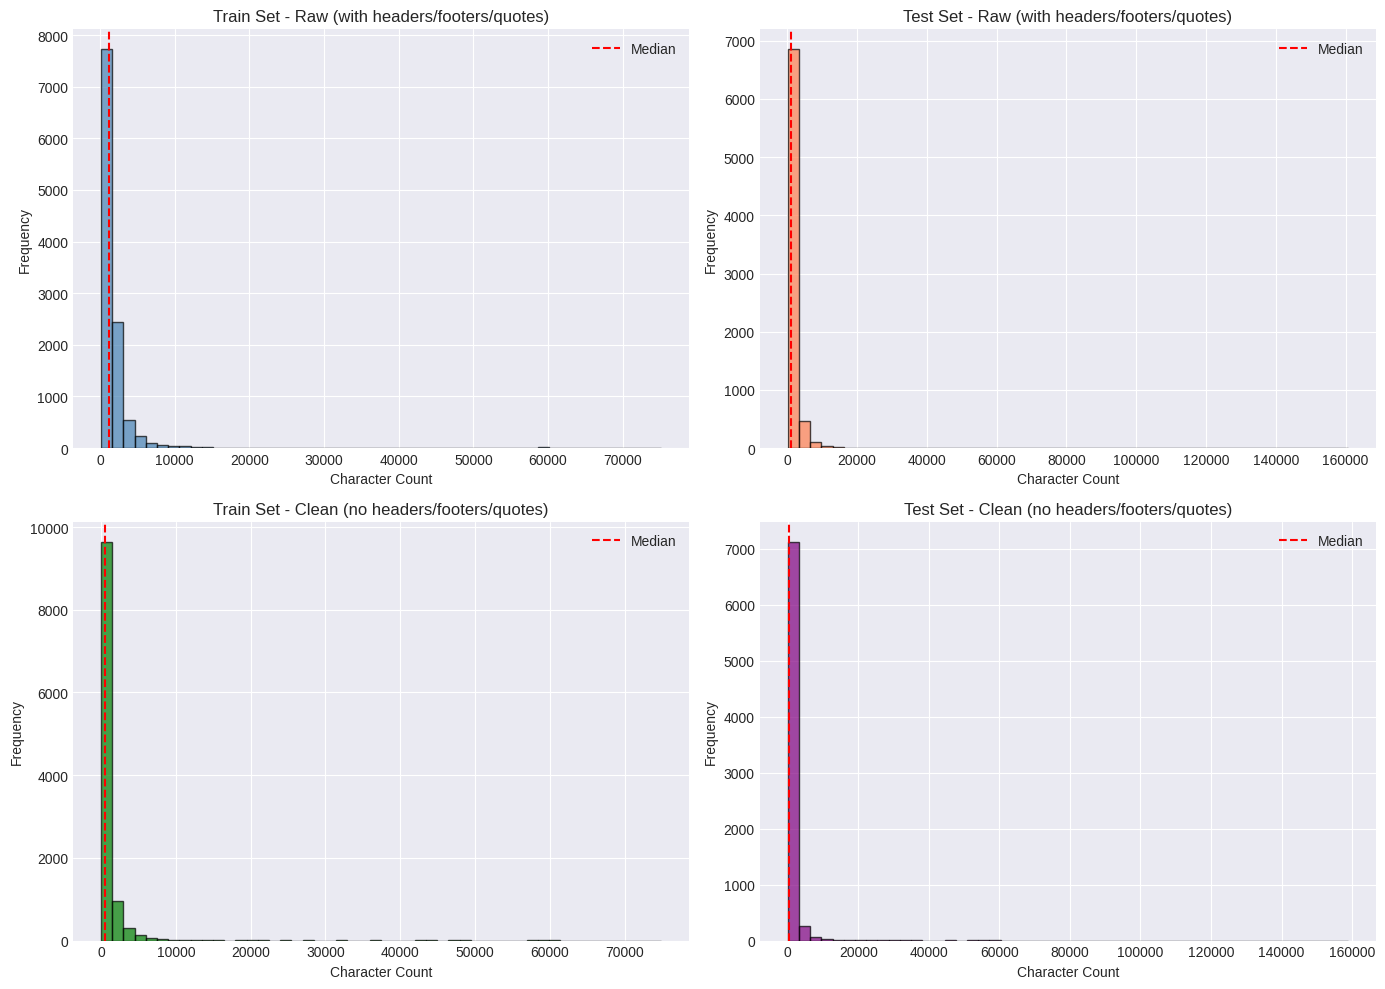

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(train_char_lengths, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Train Set - Raw (with headers/footers/quotes)')
axes[0, 0].axvline(np.median(train_char_lengths), color='red', linestyle='--', label='Median')
axes[0, 0].legend()

axes[0, 1].hist(test_char_lengths, bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Character Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Test Set - Raw (with headers/footers/quotes)')
axes[0, 1].axvline(np.median(test_char_lengths), color='red', linestyle='--', label='Median')
axes[0, 1].legend()

axes[1, 0].hist(train_char_lengths_clean, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_xlabel('Character Count')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Train Set - Clean (no headers/footers/quotes)')
axes[1, 0].axvline(np.median(train_char_lengths_clean), color='red', linestyle='--', label='Median')
axes[1, 0].legend()

axes[1, 1].hist(test_char_lengths_clean, bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_xlabel('Character Count')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Test Set - Clean (no headers/footers/quotes)')
axes[1, 1].axvline(np.median(test_char_lengths_clean), color='red', linestyle='--', label='Median')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


In [8]:
sample_idx = 0
print(f"Sample Document Index: {sample_idx}")
print(f"Category: {category_names[newsgroups_train_raw.target[sample_idx]]}")
print(f"\n{'='*80}\nRAW VERSION (first 800 chars):\n{'='*80}")
print(newsgroups_train_raw.data[sample_idx][:800])
print(f"\n{'='*80}\nCLEAN VERSION (first 800 chars):\n{'='*80}")
print(newsgroups_train_clean.data[sample_idx][:800])


Sample Document Index: 0
Category: rec.autos

RAW VERSION (first 800 chars):
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----






CLEAN VERSION (first 800 chars):
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was c

In [9]:
summary_data = {
    'Track': ['Raw (no removal)', 'Clean (headers/footers/quotes removed)'],
    'Train_Samples': [len(newsgroups_train_raw.data), len(newsgroups_train_clean.data)],
    'Test_Samples': [len(newsgroups_test_raw.data), len(newsgroups_test_clean.data)],
    'Avg_Doc_Length_Train': [np.mean(train_char_lengths), np.mean(train_char_lengths_clean)],
    'Avg_Doc_Length_Test': [np.mean(test_char_lengths), np.mean(test_char_lengths_clean)]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.round(2))


                                    Track  Train_Samples  Test_Samples  \
0                        Raw (no removal)          11314          7532   
1  Clean (headers/footers/quotes removed)          11314          7532   

   Avg_Doc_Length_Train  Avg_Doc_Length_Test  
0               1949.31              1832.25  
1               1218.14              1096.86  


In [11]:
summary_data = {
    'Track': ['Raw (no removal)', 'Clean (headers/footers/quotes removed)'],
    'Train_Samples': [len(newsgroups_train_raw.data), len(newsgroups_train_clean.data)],
    'Test_Samples': [len(newsgroups_test_raw.data), len(newsgroups_test_clean.data)],
    'Avg_Doc_Length_Train': [np.mean(train_char_lengths), np.mean(train_char_lengths_clean)],
    'Avg_Doc_Length_Test': [np.mean(test_char_lengths), np.mean(test_char_lengths_clean)]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.round(2))


                                    Track  Train_Samples  Test_Samples  \
0                        Raw (no removal)          11314          7532   
1  Clean (headers/footers/quotes removed)          11314          7532   

   Avg_Doc_Length_Train  Avg_Doc_Length_Test  
0               1949.31              1832.25  
1               1218.14              1096.86  



## Analysis of Step 1 Results

Based on the outputs from your data gathering phase:

**Dataset Overview:**
- 20 balanced newsgroup categories across 5 thematic domains
- Train: 11,314 documents | Test: 7,532 documents (60/40 split)
- Class distribution: Relatively balanced (3.33% - 5.30% per class)

**Key Observations:**

1. **Class Imbalance**: Minor imbalance exists
   - Smallest: `talk.religion.misc` (3.33%)
   - Largest: `rec.sport.hockey` (5.30%)
   - Imbalance ratio: ~1.6x (manageable)

2. **Document Length Statistics**:
   - **Raw**: Mean ~1,949 chars, Median ~1,178 chars (highly skewed)
   - **Clean**: Mean ~1,218 chars, Median ~491 chars (37% reduction)
   - High variance (std > mean) indicates outliers
   - Some clean docs have 0 length (documents with only headers/quotes)

3. **Data Quality Issues**:
   - Max lengths: 75K-160K chars (extreme outliers)
   - Clean version has documents with 0 characters (needs handling)
   - Right-skewed distribution (long tail of verbose documents)

4. **Raw vs Clean Trade-off**:
   - Raw retains metadata useful for some models
   - Clean focuses on content, removes noise
   - **Recommendation**: Proceed with **both tracks** for comparison
